In [3]:
%matplotlib ipympl
import numpy as np
from qmsolve import Hamiltonian, SingleParticle, TimeSimulation, init_visualization, femtoseconds, m_e, Å

In [15]:
#interaction potential
def potential_barrier(particle):
    #This wavefunction correspond to a gaussian wavepacket with a mean X momentum equal to p_x0
    V0 = 1.5
    a = 2  * Å
    x0 = 2  * Å
    barrier = np.where((particle.x > x0 - a/2) & (particle.x < x0 + a/2), V0, 0)
    return barrier

#build the Hamiltonian of the system
H = Hamiltonian(particles = SingleParticle(m = m_e), 
                potential = potential_barrier, 
                spatial_ndim = 1, N = 600, extent = 50 * Å)


#wavefunction at t = 0. 
def initial_wavefunction(particle):
    #This wavefunction correspond to a gaussian wavepacket with a mean X momentum equal to p_x0
    σ = 0.7 * Å
    v0 = 40 * Å / femtoseconds
    p_x0 = m_e * v0
    return np.exp( -1/(4* σ**2) * ((particle.x+10)**2) / np.sqrt(2*np.pi* σ**2))  *np.exp(p_x0*particle.x*1j)

Took 1.5069987773895264


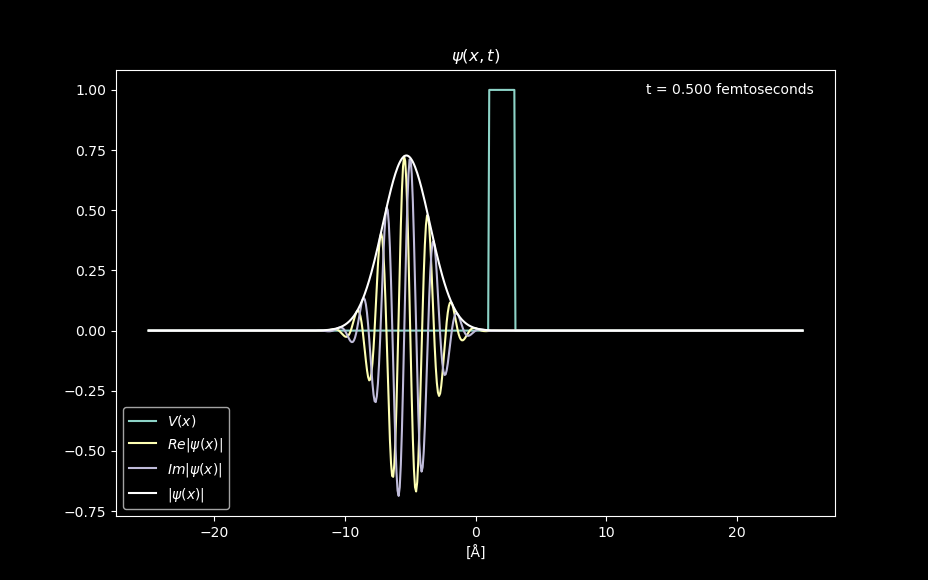

In [16]:
total_time = 0.5 * femtoseconds

#set the time dependent simulation
sim = TimeSimulation(hamiltonian = H, method = "split-step")
sim.run(initial_wavefunction, total_time = total_time, dt = total_time/5000., store_steps = 800)

#visualize the time dependent simulation
visualization = init_visualization(sim)
visualization.animate(animation_duration = 10, fps = 30, save_animation=True)

In [17]:
import os
if os.path.isfile("animation.gif"):
	os.remove("animation.gif")
# For output representing on notebook
import ffmpy
ff = ffmpy.FFmpeg(
	inputs = {"animation.mp4" : None},
	outputs = {"animation.gif" : None})

ff.run()

(None, None)